In [170]:
#importing 
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor,
    plot_tree
)

from sklearn.ensemble import (
    BaggingClassifier,
    BaggingRegressor,
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

In [243]:
df = pd.read_csv("data.csv",sep=";")

df['Target'] = pd.Categorical(df['Target'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   int64   
 1   Application mode                                4424 non-null   int64   
 2   Application order                               4424 non-null   int64   
 3   Course                                          4424 non-null   int64   
 4   Daytime/evening attendance	                     4424 non-null   int64   
 5   Previous qualification                          4424 non-null   int64   
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   int64   
 8   Mother's qualification                          4424 non-null   int64   
 9   Father's qualification        

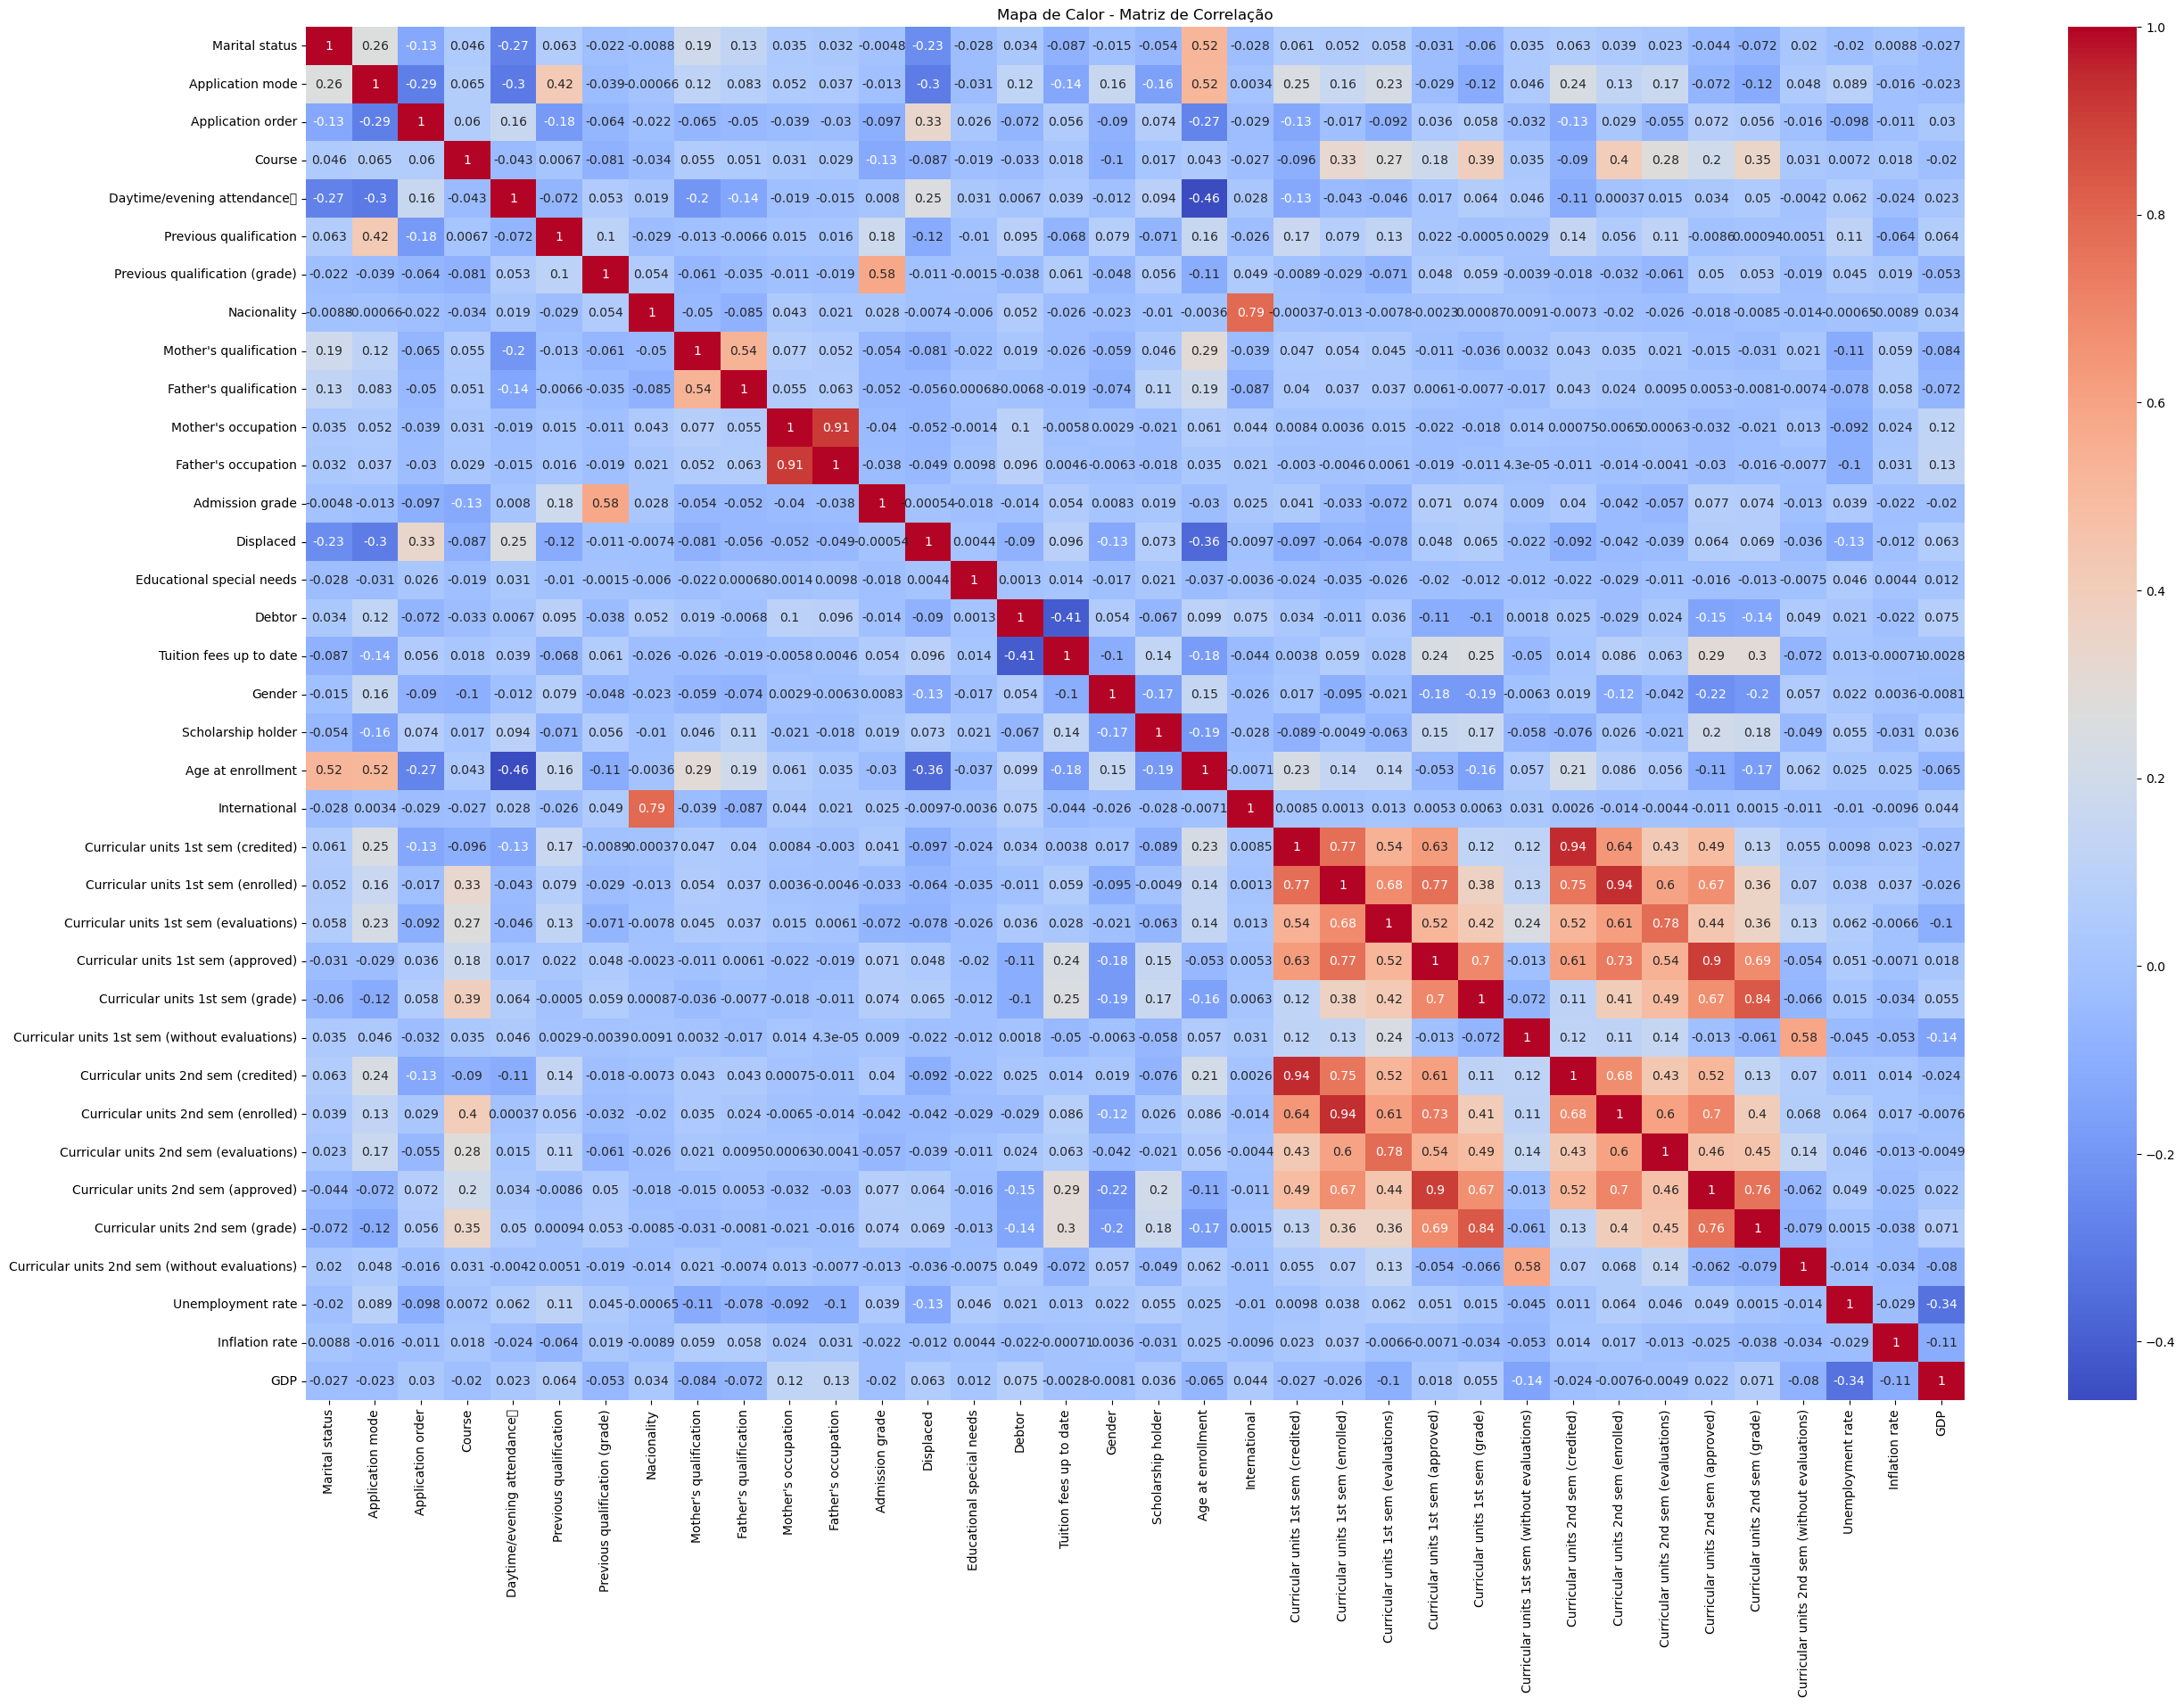

In [262]:
# Calcule a matriz de correlação
matriz_correlacao = df.corr()

# Crie um mapa de calor da matriz de correlação
plt.figure(figsize=(30, 20))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm")
plt.title("Mapa de Calor - Matriz de Correlação")
plt.show()

In [172]:
df.head(n=5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [245]:
df['Target'].cat.categories
df['Target']

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 4424, dtype: category
Categories (3, object): ['Dropout', 'Enrolled', 'Graduate']

In [246]:
y = df["Target"]

X = df.loc[:,"Marital status":"GDP"]


In [247]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [248]:
dtree =  DecisionTreeClassifier(max_depth=7)

In [249]:
bagg_clf = BaggingClassifier(
                           n_estimators = 200,
                           max_features = 10,
                           max_samples=200
                            )

In [250]:
bagg_clf.fit(x_train,y_train)
y_hat = bagg_clf.predict(x_test)

In [251]:
bagg_clf.score(X=x_test,y=y_test)

0.7265536723163842

In [252]:
#pesquisar Baggin Regressor

In [253]:
#Random Forest

In [254]:
rf_clf = RandomForestClassifier(n_estimators = 30,
                                max_depth=20,
                               min_samples_split=4)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=4, n_estimators=30)

In [255]:
y_rf_hat = rf_clf.predict(x_test)

In [256]:
print(classification_report(y_true = y_test,
                           y_pred = y_rf_hat))

              precision    recall  f1-score   support

     Dropout       0.80      0.76      0.78       287
    Enrolled       0.60      0.32      0.42       182
    Graduate       0.76      0.94      0.84       416

    accuracy                           0.75       885
   macro avg       0.72      0.67      0.68       885
weighted avg       0.74      0.75      0.73       885



In [184]:
#AdaBoost

In [259]:
ada_clf = AdaBoostClassifier(n_estimators = 200)
ada_clf.fit(x_train,y_train)
y_ada_hat = ada_clf.predict(x_test)
print(classification_report(y_true = y_test,
                           y_pred = y_ada_hat))

              precision    recall  f1-score   support

     Dropout       0.79      0.78      0.79       287
    Enrolled       0.59      0.42      0.49       182
    Graduate       0.79      0.90      0.84       416

    accuracy                           0.76       885
   macro avg       0.73      0.70      0.71       885
weighted avg       0.75      0.76      0.75       885



In [189]:
from sklearn.ensemble import  GradientBoostingClassifier

In [190]:
gbt_clf = GradientBoostingClassifier(n_estimators=50,learning_rate=0.5)
gbt_clf.fit(x_train,y_train)
y_gbt_hat = gbt_clf.predict(x_test)

print(classification_report(y_true = y_test,
                           y_pred = y_gbt_hat))

              precision    recall  f1-score   support

     Dropout       0.80      0.79      0.80       294
    Enrolled       0.59      0.40      0.48       176
    Graduate       0.79      0.91      0.84       415

    accuracy                           0.77       885
   macro avg       0.73      0.70      0.71       885
weighted avg       0.75      0.77      0.76       885



In [191]:
#Histogram Gradient Boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [194]:
hgb_clf = HistGradientBoostingClassifier(max_iter=600)
hgb_clf.fit(x_train,y_train)
y_hgb_hat = hgb_clf.predict(x_test)
print(classification_report(y_true = y_test,
                           y_pred = y_hgb_hat))

              precision    recall  f1-score   support

     Dropout       0.81      0.79      0.80       294
    Enrolled       0.64      0.40      0.49       176
    Graduate       0.79      0.93      0.86       415

    accuracy                           0.78       885
   macro avg       0.75      0.71      0.72       885
weighted avg       0.77      0.78      0.76       885



In [112]:
#Voting Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [237]:
clf1 = LogisticRegression(solver='newton-cg')
clf2 = RandomForestClassifier(n_estimators = 10,max_depth=20,min_samples_split=2)
clf3 = svm.SVC(kernel = 'rbf').fit(x_train,y_train)
clf4 = DecisionTreeClassifier(max_depth=7)
hgb_clf = HistGradientBoostingClassifier(max_iter=100)


In [238]:
voting_clf = VotingClassifier(estimators =[
    ('lr',clf1),
    ('rf',clf2),
    ('gnb',clf3),
    ('hgb',hgb_clf)
],voting='hard')

In [239]:
voting_clf.fit(x_train,y_train)
y_voting_hat = voting_clf.predict(x_test)

In [240]:
print(classification_report(y_true = y_test,
                           y_pred = y_voting_hat))

              precision    recall  f1-score   support

     Dropout       0.82      0.81      0.82       294
    Enrolled       0.69      0.35      0.46       176
    Graduate       0.78      0.95      0.85       415

    accuracy                           0.78       885
   macro avg       0.76      0.70      0.71       885
weighted avg       0.77      0.78      0.76       885



In [217]:
#Stacking
from sklearn import svm

from sklearn.ensemble import StackingClassifier

In [229]:
clf1 = LogisticRegression(solver='newton-cg')
clf2 = RandomForestClassifier(n_estimators = 70)
clf3 = svm.SVC(kernel = 'rbf').fit(x_train,y_train)
clf4 = DecisionTreeClassifier(max_depth=6)


In [230]:
stack_clf = VotingClassifier(estimators =[
    ('lr',clf1),
    ('rf',clf2),
    ('gnb',clf3),
    ('dt', clf4)
])

In [231]:
stack_clf.fit(x_train,y_train)
y_stack_hat = stack_clf.predict(x_test)

In [232]:
print(classification_report(y_true = y_test,
                           y_pred = y_stack_hat))

              precision    recall  f1-score   support

     Dropout       0.84      0.79      0.81       294
    Enrolled       0.69      0.38      0.49       176
    Graduate       0.78      0.96      0.86       415

    accuracy                           0.79       885
   macro avg       0.77      0.71      0.72       885
weighted avg       0.78      0.79      0.77       885

